In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [96]:
# Загружаем датасет 
df = pd.read_csv('kicksharing.csv')

In [97]:
# Посмотрим на первые 5 записей
df.head()

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,transport_model,distance_km,created_dttm,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt
0,266071307,761067705,M,40,UGR,DIV,ТЮМЕНСКАЯ ОБЛ,4.99,30.0,300.0,SL,3.690479,2024-08-07 09:47:25.000000,2024-08-07 09:47:29.325252,2024-08-07 10:07:59.339524,5,2024-08-07 11:47:29.325252,134.79,19.48,NaN
1,355113920,614049469,F,30,GRD,MAR,РОСТОВСКАЯ ОБЛ,8.49,50.0,300.0,SL,1.114912,2024-10-17 14:57:20.000000,2024-10-17 14:57:24.586000,2024-10-17 15:04:19.419607,3,2024-10-17 14:57:24.586000,109.43,40.30,NaN
2,347424551,757583701,M,28,UGR,UNM,СВЕРДЛОВСКАЯ ОБЛ,5.99,30.0,300.0,E,1.515612,2024-09-19 05:31:41.000000,2024-09-19 05:34:59.476000,2024-09-19 05:41:50.164372,5,2024-09-19 07:34:59.476000,71.93,10.79,NaN
3,351562959,541367366,M,24,GRD,UNM,Г МОСКВА,8.99,50.0,300.0,SL,0.499411,2024-10-04 16:05:09.000000,2024-10-04 16:05:13.162000,2024-10-04 16:07:31.724918,3,2024-10-04 16:05:13.162000,76.97,7.70,NaN
4,258647149,238473615,M,34,NaN,NaN,Г МОСКВА,6.99,50.0,300.0,SL,2.602028,2024-07-10 06:57:40.000000,2024-07-10 06:57:43.017125,2024-07-10 07:07:48.446462,3,2024-07-10 06:57:43.017125,126.89,25.38,NaN


In [ ]:
#Посмотрим краткую сводку по датасету
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396749 entries, 0 to 396748
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   order_rk                 396749 non-null  int64  
 1   party_rk                 396749 non-null  int64  
 2   gender_cd                393828 non-null  object 
 3   age                      396749 non-null  int64  
 4   education_level_cd       190059 non-null  object 
 5   marital_status_cd        217729 non-null  object 
 6   lvn_state_nm             362572 non-null  object 
 7   minute_cost              396749 non-null  float64
 8   activation_cost          396749 non-null  float64
 9   hold_amount              396749 non-null  float64
 10  transport_model          396749 non-null  object 
 11  distance_km              396749 non-null  float64
 12  created_dttm             396749 non-null  object 
 13  book_start_dttm          396749 non-null  object 
 14  book

In [99]:
# Рассмотрим отдельно числовые столбцы
numeric_cols = ['age', 'minute_cost', 'activation_cost', 'hold_amount', 
                'distance_km', 'nominal_price_rub_amt', 'loyalty_accrual_rub_amt']
df[numeric_cols].describe()

,age,minute_cost,activation_cost,hold_amount,distance_km,nominal_price_rub_amt,loyalty_accrual_rub_amt
count,396749.000000,396749.000000,396749.000000,396749.000000,396749.000000,396749.000000,366992.000000
mean,31.544006,7.288688,42.593226,299.983869,3.681031,127.647694,37.516121
std,9.434545,1.289492,11.989974,1.939153,141.862349,100.122365,75.208560
min,12.000000,1.500000,0.000000,80.000000,0.000000,0.000000,-161.940000
25%,24.000000,6.490000,30.000000,300.000000,0.941054,80.840000,11.240000
50%,31.000000,7.490000,50.000000,300.000000,1.729883,103.940000,18.730000
75%,37.000000,8.220000,50.000000,300.000000,3.063694,142.100000,35.060000
max,94.000000,19.990000,50.000000,500.000000,56012.640308,5627.640000,3185.000000


In [100]:
# Посмотрим на количество уникальных значений в каждом числовом столбце
df[numeric_cols].nunique()

age                            77
minute_cost                   547
activation_cost                10
hold_amount                     3
distance_km                384385
nominal_price_rub_amt       16713
loyalty_accrual_rub_amt     18483
dtype: int64

In [101]:
# Удаляем столбец hold_amount, так как на весь датассет 3 уникальных значения
del df['hold_amount'] 
numeric_cols.remove('hold_amount')

Text(0.5, 0.98, 'Анализ распределения числовых переменных')

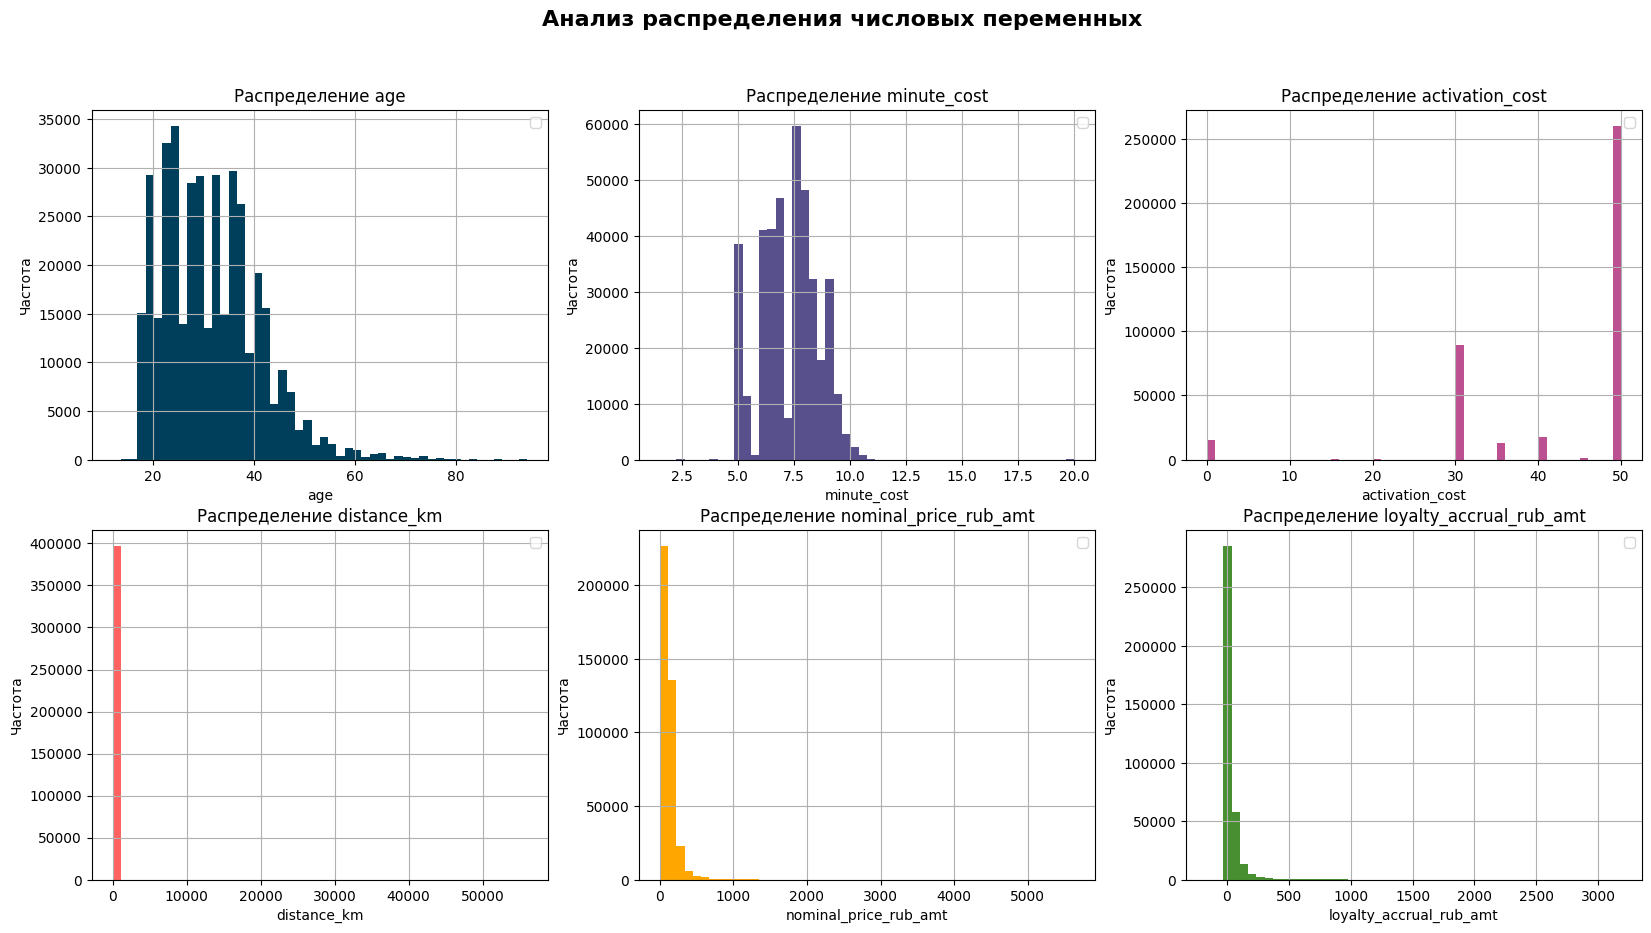

In [102]:
# В некоторых столбцах есть выбросы, визуализируем это
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
axes = axes.ravel()
colors = ['#003f5c', '#58508d', '#bc5090', '#ff6361', '#ffa600', '#488f31']

for i, col in enumerate(numeric_cols):
    df[col].hist(bins=50, ax=axes[i], color=colors[i])
    axes[i].set_title(f'Распределение {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Частота')
    axes[i].set_title(f'Распределение {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Частота')
    axes[i].legend()

plt.suptitle('Анализ распределения числовых переменных', fontsize=16, fontweight='bold')

In [103]:
# Проведем детальный анализ выбросов, боксплоты получаются страшные, поэтому выведем числа
print(40 * '=')
print("ДЕТАЛЬНЫЙ СТАТИСТИЧЕСКИЙ АНАЛИЗ ВЫБРОСОВ")
print(40 * '=')
for i, col in enumerate(numeric_cols):
    print(40 * '-')
    print(f"АНАЛИЗ ПЕРЕМЕННОЙ: {col}")
    print(40 * '-')
    # Базовые статистики
    data = df[col]

    # Посчитаем границы как интервал (Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)
    Q1 = data.quantile(0.25) # Первый квартиль
    Q3 = data.quantile(0.75) # Третий квартиль
    IQR = Q3 - Q1 # Межквартильный размах
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Выбросы
    lower_outliers = data[data < lower_bound]
    upper_outliers = data[data > upper_bound]
    total_outliers = len(lower_outliers) + len(upper_outliers)
    outlier_percentage = (total_outliers / len(data)) * 100
    
    print(f"Всего выбросов: {total_outliers} ({outlier_percentage:.2f}%)")
    print(f"Нижних выбросов (< {lower_bound:.4f}): {len(lower_outliers)}")
    print(f"Верхних выбросов (> {upper_bound:.4f}): {len(upper_outliers)}")

ДЕТАЛЬНЫЙ СТАТИСТИЧЕСКИЙ АНАЛИЗ ВЫБРОСОВ
----------------------------------------
АНАЛИЗ ПЕРЕМЕННОЙ: age
----------------------------------------
Всего выбросов: 5678 (1.43%)
Нижних выбросов (< 4.5000): 0
Верхних выбросов (> 56.5000): 5678
----------------------------------------
АНАЛИЗ ПЕРЕМЕННОЙ: minute_cost
----------------------------------------
Всего выбросов: 65 (0.02%)
Нижних выбросов (< 3.8950): 44
Верхних выбросов (> 10.8150): 21
----------------------------------------
АНАЛИЗ ПЕРЕМЕННОЙ: activation_cost
----------------------------------------
Всего выбросов: 0 (0.00%)
Нижних выбросов (< 0.0000): 0
Верхних выбросов (> 80.0000): 0
----------------------------------------
АНАЛИЗ ПЕРЕМЕННОЙ: distance_km
----------------------------------------
Всего выбросов: 26495 (6.68%)
Нижних выбросов (< -2.2429): 0
Верхних выбросов (> 6.2477): 26495
----------------------------------------
АНАЛИЗ ПЕРЕМЕННОЙ: nominal_price_rub_amt
----------------------------------------
Всего выбросов: 314

In [104]:
# Избавимся от выбросов, уберем данные, лежащие вне интервала (Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)
Q1 = df[numeric_cols].quantile(0.25) # Первый квартиль
Q3 = df[numeric_cols].quantile(0.75) # Третий квартиль
IQR = Q3 - Q1 # Межквартильный размах
clean_mask = df[(df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))].any(axis=1)
clean_df = df[~clean_mask]

# Сравним датасет до и после удаления выбросов
original_count = len(df)
clean_count = len(clean_df)
removed_count = original_count - clean_count
removed_percent = (removed_count / original_count) * 100

print(37 * '=')
print("УДАЛЕНИЕ ВЫБРОСОВ")
print(37 * '=')
print(f"Исходное количество записей: {original_count:,}")
print(f"Количество после очистки: {clean_count:,}")
print(f"Удалено записей: {removed_count:,}")
print(f"Процент удаленных данных: {removed_percent:.2f}%")
print(f"Процент сохраненных данных: {(clean_count / original_count) * 100:.2f}%")

УДАЛЕНИЕ ВЫБРОСОВ
Исходное количество записей: 396,749
Количество после очистки: 325,186
Удалено записей: 71,563
Процент удаленных данных: 18.04%
Процент сохраненных данных: 81.96%


In [105]:
clean_df[numeric_cols].describe()

,age,minute_cost,activation_cost,distance_km,nominal_price_rub_amt,loyalty_accrual_rub_amt
count,325186.000000,325186.000000,325186.000000,325186.000000,325186.000000,298599.000000
mean,30.981386,7.250229,42.362463,1.810821,102.237148,20.012701
std,8.578247,1.285185,12.298859,1.329110,40.889419,13.592072
min,12.000000,4.000000,0.000000,0.000000,0.000000,-5.000000
25%,24.000000,6.490000,30.000000,0.851175,77.870000,10.230000
50%,30.000000,7.490000,50.000000,1.524003,97.350000,15.790000
75%,37.000000,8.140000,50.000000,2.512137,123.620000,25.470000
max,56.000000,10.790000,50.000000,6.247511,233.960000,70.790000


Text(0.5, 0.98, 'Анализ распределения числовых переменных после очистки')

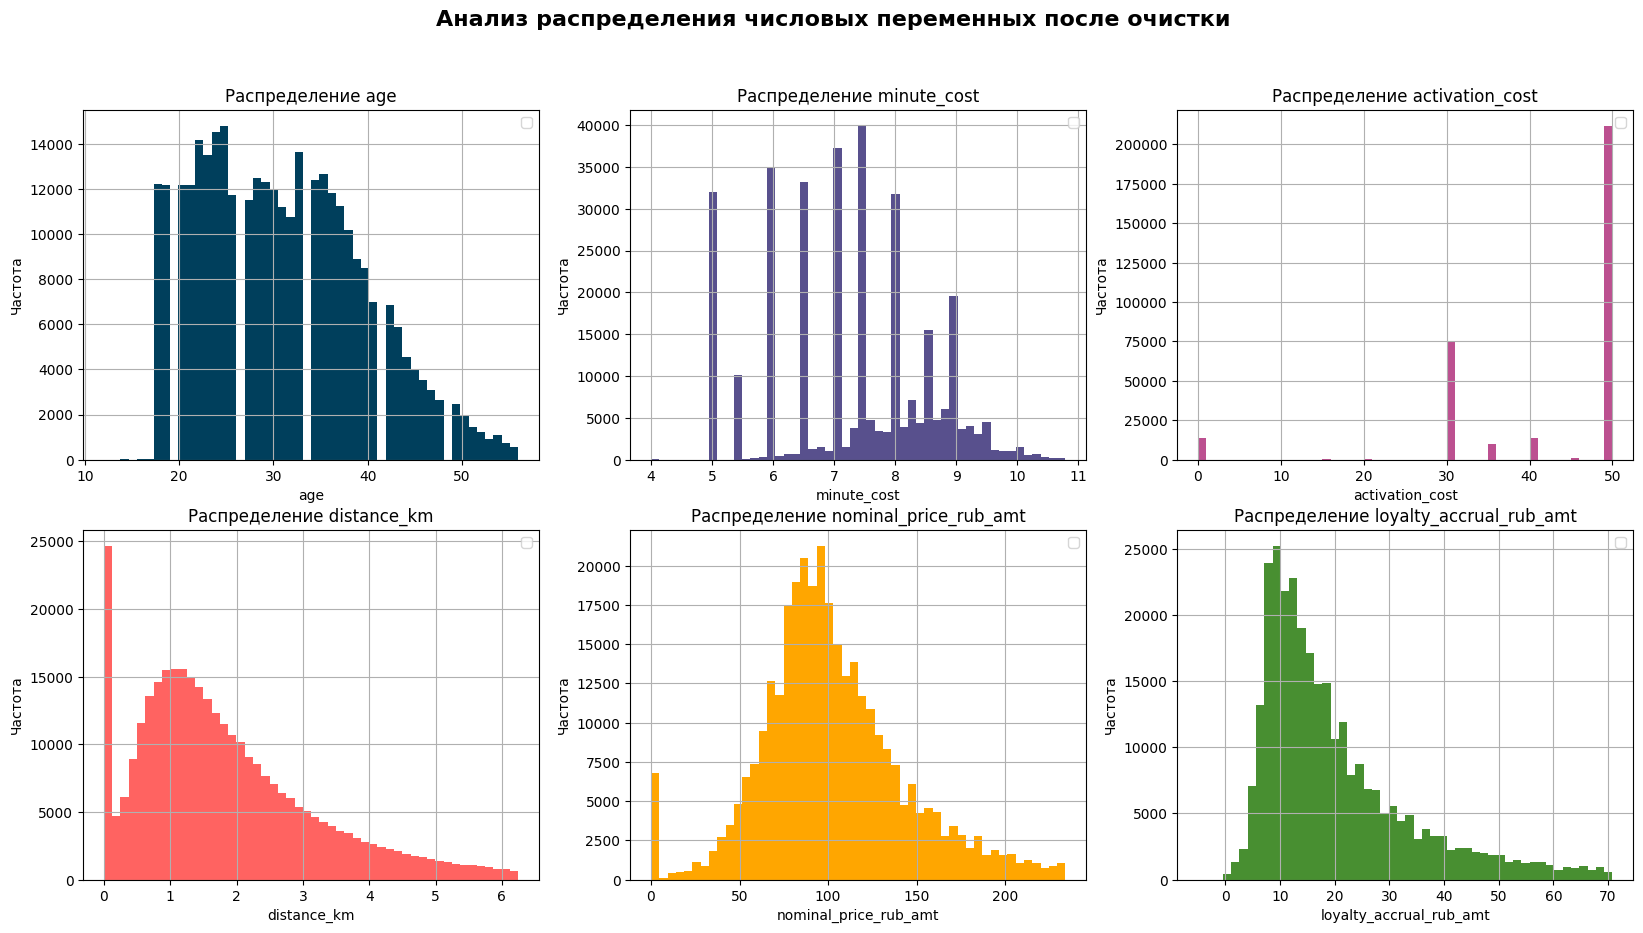

In [106]:
# Визуализируем распределения числовых столбцов после удаления выбросов
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
axes = axes.ravel()
colors = ['#003f5c', '#58508d', '#bc5090', '#ff6361', '#ffa600', '#488f31']

for i, col in enumerate(numeric_cols):
    clean_df[col].hist(bins=50, ax=axes[i], color=colors[i])
    axes[i].set_title(f'Распределение {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Частота')
    
    axes[i].set_title(f'Распределение {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Частота')
    axes[i].legend()

plt.suptitle('Анализ распределения числовых переменных после очистки', fontsize=16, fontweight='bold')

Text(0.5, 0.98, 'Анализ распределения категориальных переменных')

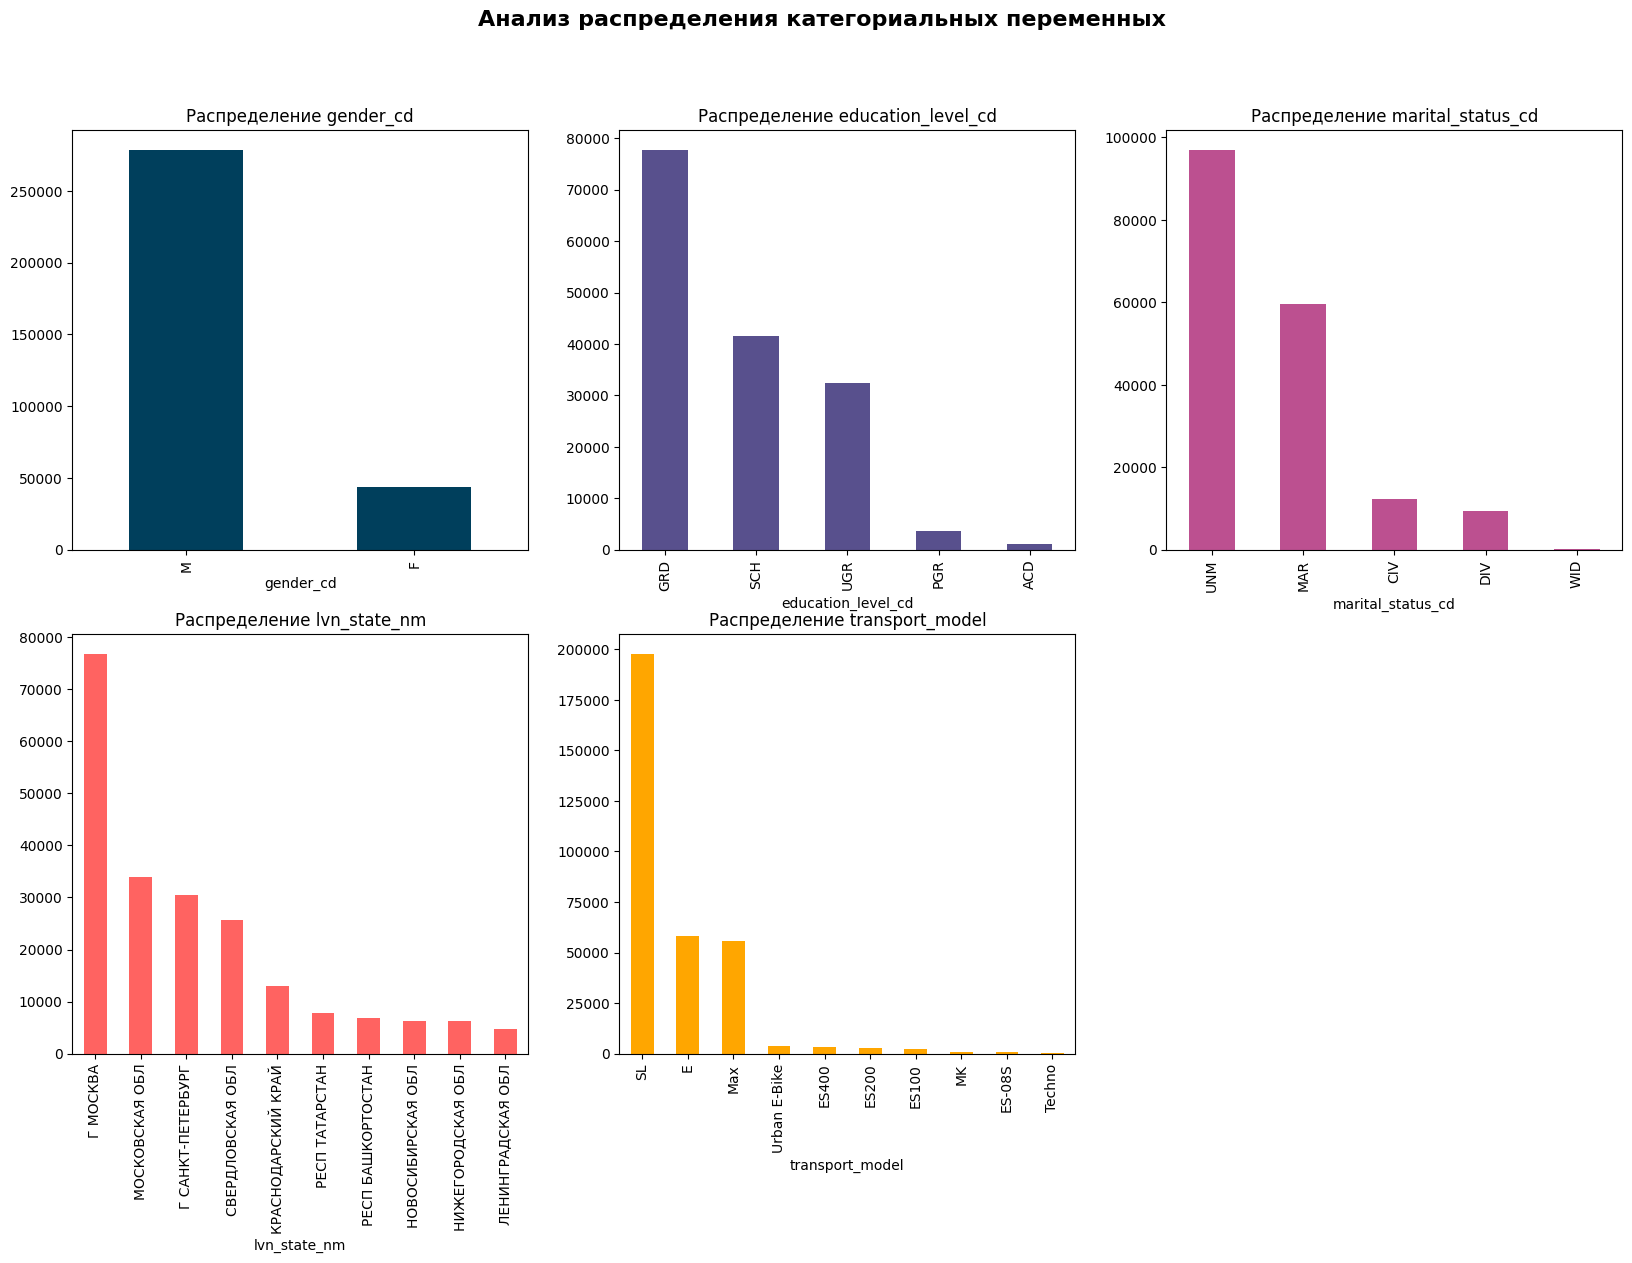

In [ ]:
# Анализ распределений категориальных переменных
categorical_cols = ['gender_cd', 'education_level_cd', 'marital_status_cd', 
                   'lvn_state_nm', 'transport_model']

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.ravel()
colors = ['#003f5c', '#58508d', '#bc5090', '#ff6361', '#ffa600']

for i, col in enumerate(categorical_cols):
    if col in df.columns:
        value_counts = clean_df[col].value_counts().head(10)
        value_counts.plot(kind='bar',color=colors[i], ax=axes[i])
        axes[i].set_title(f'Распределение {col}')
        axes[i].tick_params(axis='x')

axes[5].set_visible(False)
plt.suptitle('Анализ распределения категориальных переменных', fontsize=16, fontweight='bold')

Text(0.5, 0.98, 'Анализ распределения поездок по временным паттернам')

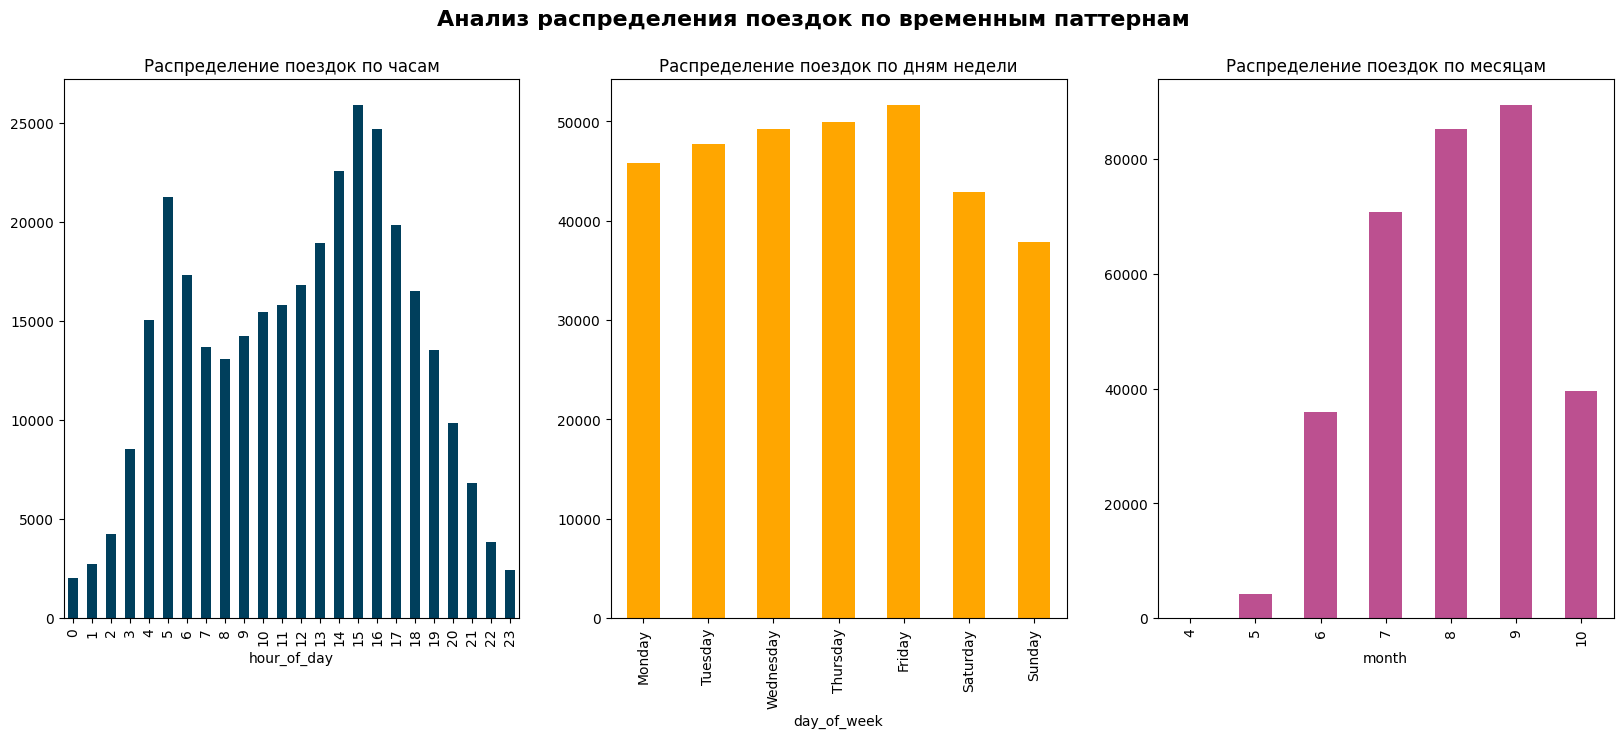

In [108]:
# Преобразование временных меток
date_cols = ['created_dttm', 'book_start_dttm', 'book_end_dttm', 'local_book_start_dttm']
for col in date_cols:
    clean_df[f'{col}_dt'] = pd.to_datetime(df[col])

# Анализ временных паттернов
clean_df['hour_of_day'] = clean_df['book_start_dttm_dt'].dt.hour
clean_df['day_of_week'] = clean_df['book_start_dttm_dt'].dt.day_name()
clean_df['month'] = clean_df['book_start_dttm_dt'].dt.month

# Визуализация временных паттернов
fig, axes = plt.subplots(1, 3, figsize=(20, 7))
# По часам
clean_df['hour_of_day'].value_counts().sort_index().plot(kind='bar', color='#003f5c', ax=axes[0])
axes[0].set_title('Распределение поездок по часам')

# По дням недели
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
clean_df['day_of_week'].value_counts().reindex(day_order).plot(kind='bar', color='#ffa600', ax=axes[1])
axes[1].set_title('Распределение поездок по дням недели')

# По месяцам
clean_df['month'].value_counts().sort_index().plot(kind='bar', color='#bc5090', ax=axes[2])
axes[2].set_title('Распределение поездок по месяцам')

plt.suptitle('Анализ распределения поездок по временным паттернам', fontsize=16, fontweight='bold')

In [ ]:
# Сформулируем несколько гипотез
# Создаем копию датафрейма для анализа
df_analysis = clean_df.copy()

# Рассчитаем длительность поездки в минутах
df_analysis['trip_duration_min'] = (df_analysis['book_end_dttm_dt'] - df_analysis['book_start_dttm_dt']).dt.total_seconds() / 60

# Добавим день недели и час
df_analysis['day_of_week'] = df_analysis['book_start_dttm_dt'].dt.day_name()
df_analysis['hour'] = df_analysis['book_start_dttm_dt'].dt.hour


ГИПОТЕЗА 1: Влияние уровня образования на финансовое поведение
Статистика по уровням образования:
                    avg_price  median_price  count  avg_cashback  \
education_level_cd                                                 
ACD                    106.59        100.91   1052         22.27   
GRD                    103.20         97.94  77771         20.46   
PGR                    105.40         98.93   3563         22.52   
SCH                    100.58         94.94  41586         18.85   
UGR                    101.48         95.89  32383         19.66   

                    cashback_ratio  avg_duration  avg_distance  
education_level_cd                                              
ACD                           0.94          8.53          1.90  
GRD                           0.90          8.13          1.81  
PGR                           0.90          7.93          1.72  
SCH                           0.89          8.37          1.88  
UGR                           0.89

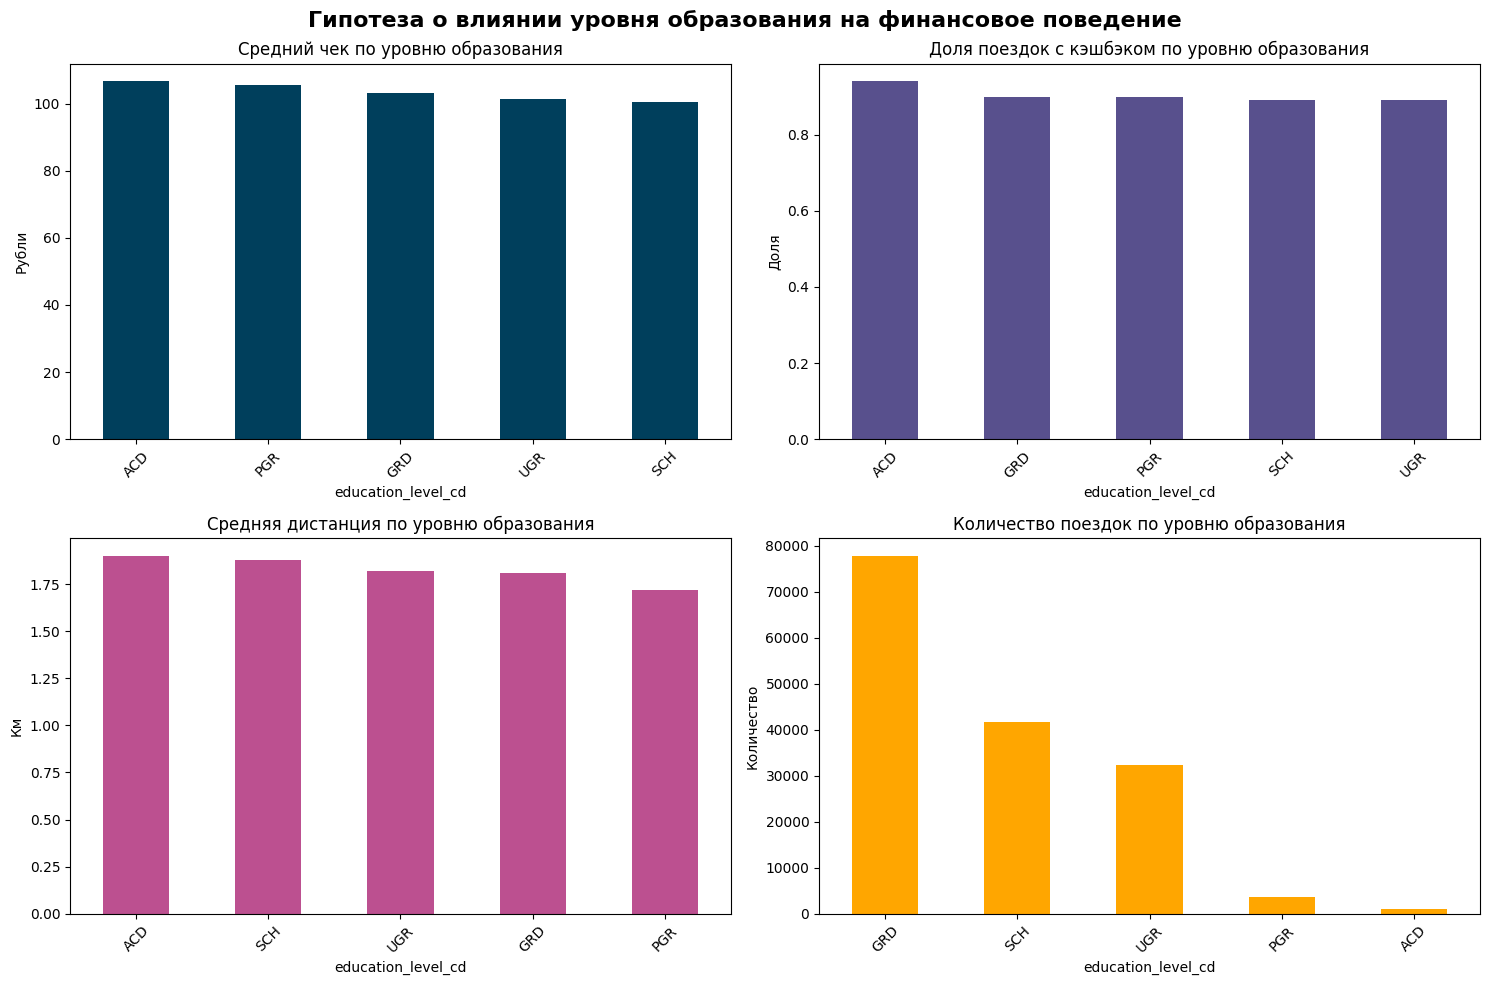

In [ ]:
# ГИПОТЕЗА 1: Влияние уровня образования на финансовое поведение
print("\n" + "="*62)
print("ГИПОТЕЗА 1: Влияние уровня образования на финансовое поведение")
print("="*62)

# Группируем по уровню образования
edu_analysis = df_analysis.groupby('education_level_cd').agg({
    'nominal_price_rub_amt': ['mean', 'median', 'count'],
    'loyalty_accrual_rub_amt': ['mean', lambda x: (x > 0).mean()],  # доля поездок с кэшбэком
    'trip_duration_min': 'mean',
    'distance_km': 'mean'
}).round(2)

edu_analysis.columns = ['avg_price', 'median_price', 'count', 'avg_cashback', 'cashback_ratio', 'avg_duration', 'avg_distance']

print("Статистика по уровням образования:")
print(edu_analysis)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Средний чек по образованию
edu_analysis_sorted_price = edu_analysis.sort_values('avg_price', ascending=False)
edu_analysis_sorted_price['avg_price'].plot(kind='bar', ax=axes[0,0], color='#003f5c')
axes[0,0].set_title('Средний чек по уровню образования')
axes[0,0].set_ylabel('Рубли')
axes[0,0].tick_params(axis='x', rotation=45)

# Доля поездок с кэшбэком
edu_analysis_sorted_cashback = edu_analysis.sort_values('cashback_ratio', ascending=False)
edu_analysis_sorted_cashback['cashback_ratio'].plot(kind='bar', ax=axes[0,1], color='#58508d')
axes[0,1].set_title('Доля поездок с кэшбэком по уровню образования')
axes[0,1].set_ylabel('Доля')
axes[0,1].tick_params(axis='x', rotation=45)

# Средняя дистанция
edu_analysis_sorted_distance = edu_analysis.sort_values('avg_distance', ascending=False)
edu_analysis_sorted_distance['avg_distance'].plot(kind='bar', ax=axes[1,0], color='#bc5090')
axes[1,0].set_title('Средняя дистанция по уровню образования')
axes[1,0].set_ylabel('Км')
axes[1,0].tick_params(axis='x', rotation=45)

# Количество поездок
edu_analysis_sorted_count = edu_analysis.sort_values('count', ascending=False)
edu_analysis_sorted_count['count'].plot(kind='bar', ax=axes[1,1], color='#ffa600')
axes[1,1].set_title('Количество поездок по уровню образования')
axes[1,1].set_ylabel('Количество')
axes[1,1].tick_params(axis='x', rotation=45)

plt.suptitle('Гипотеза о влиянии уровня образования на финансовое поведение', fontweight='bold', fontsize=15)
plt.tight_layout()


ГИПОТЕЗА 2: Сезонность и временные паттерны спроса
Статистика по дням недели:
             avg_duration  avg_distance  trip_count  avg_price
day_of_week                                                   
Monday               7.99          1.82       45853     100.26
Tuesday              8.05          1.83       47741     101.29
Wednesday            8.00          1.80       49275     100.90
Thursday             7.98          1.79       49909     100.71
Friday               8.05          1.82       51674     101.46
Saturday             8.33          1.80       42864     106.24
Sunday               8.35          1.82       37870     106.10


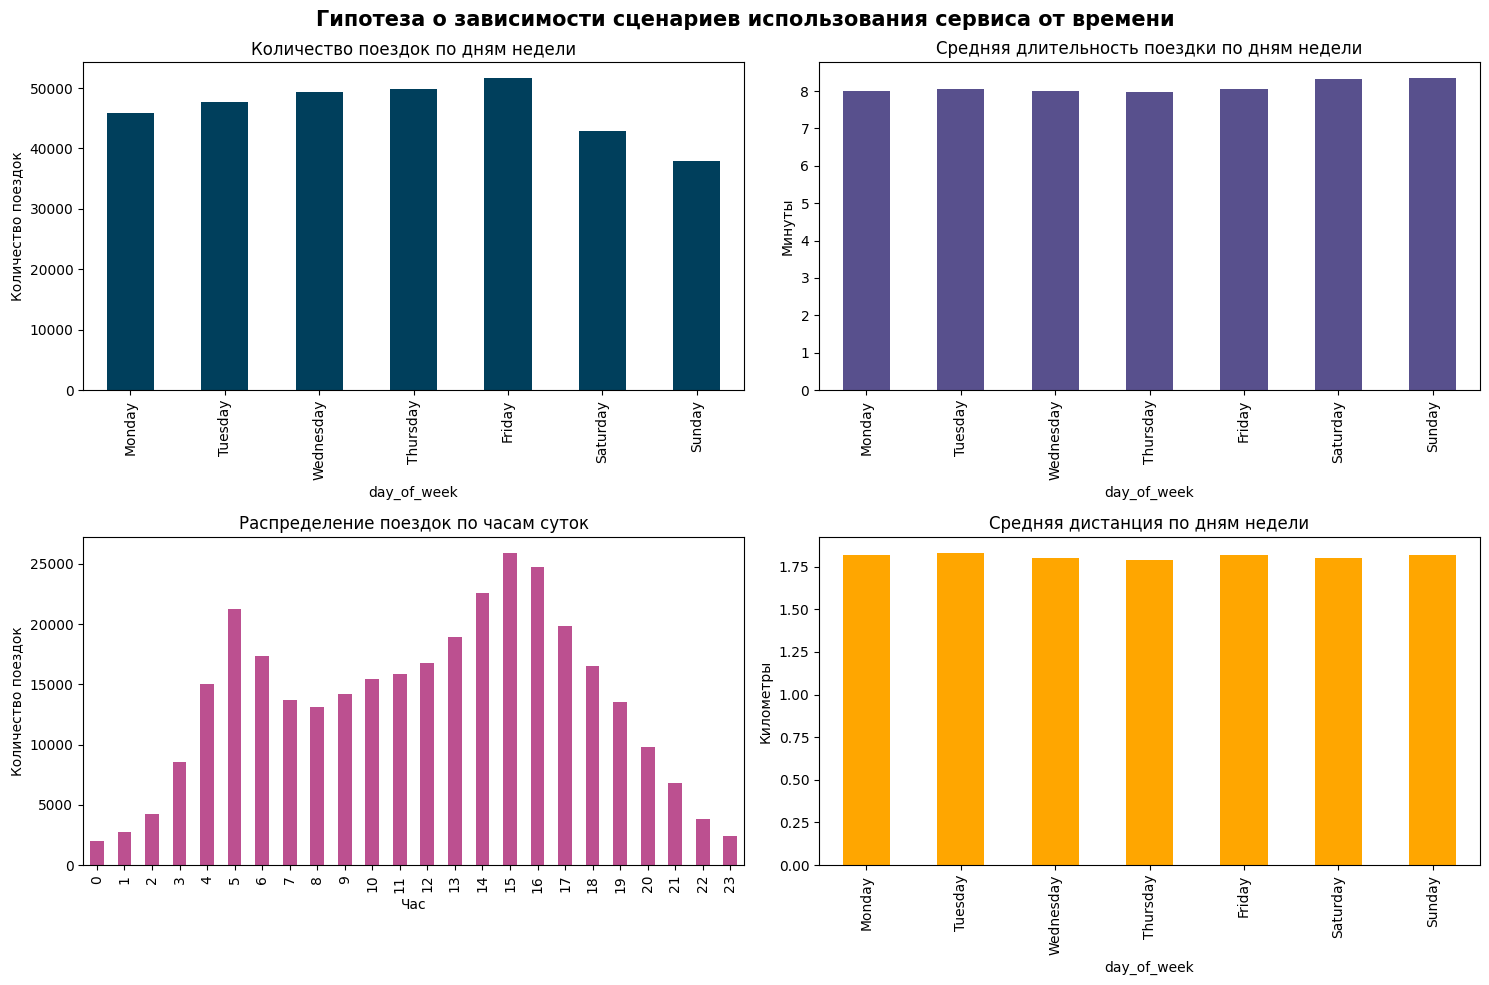

In [ ]:
# ГИПОТЕЗА 2: Сезонность и временные паттерны спроса
print("\n" + "="*50)
print("ГИПОТЕЗА 2: Сезонность и временные паттерны спроса")
print("="*50)

# Анализ по дням недели
weekday_analysis = df_analysis.groupby('day_of_week').agg({
    'trip_duration_min': 'mean',
    'distance_km': 'mean',
    'order_rk': 'count',
    'nominal_price_rub_amt': 'mean'
}).round(2)

# Упорядочим дни недели
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_analysis = weekday_analysis.reindex(day_order)

weekday_analysis.columns = ['avg_duration', 'avg_distance', 'trip_count', 'avg_price']
print("Статистика по дням недели:")
print(weekday_analysis)

# Анализ по часам
hourly_analysis = df_analysis.groupby('hour').agg({
    'order_rk': 'count',
    'trip_duration_min': 'mean',
    'distance_km': 'mean'
}).round(2)

hourly_analysis.columns = ['trip_count', 'avg_duration', 'avg_distance']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Количество поездок по дням недели
weekday_analysis['trip_count'].plot(kind='bar', ax=axes[0,0], color='#003f5c')
axes[0,0].set_title('Количество поездок по дням недели')
axes[0,0].set_ylabel('Количество поездок')

# Средняя длительность по дням недели
weekday_analysis['avg_duration'].plot(kind='bar', ax=axes[0,1], color='#58508d')
axes[0,1].set_title('Средняя длительность поездки по дням недели')
axes[0,1].set_ylabel('Минуты')

# Количество поездок по часам
hourly_analysis['trip_count'].plot(kind='bar', ax=axes[1,0], color='#bc5090')
axes[1,0].set_title('Распределение поездок по часам суток')
axes[1,0].set_ylabel('Количество поездок')
axes[1,0].set_xlabel('Час')

# Средняя дистанция по дням недели
weekday_analysis['avg_distance'].plot(kind='bar', ax=axes[1,1], color='#ffa600')
axes[1,1].set_title('Средняя дистанция по дням недели')
axes[1,1].set_ylabel('Километры')

plt.suptitle('Гипотеза о зависимости сценариев использования сервиса от времени', fontweight='bold', fontsize=15)
plt.tight_layout()


ГИПОТЕЗА 3: Влияние семейного статуса на модель использования
Статистика по семейному статусу:
                   avg_distance  median_distance  avg_duration  \
marital_status_cd                                                
CIV                       1.799            1.518         8.262   
DIV                       1.828            1.562         8.286   
MAR                       1.812            1.512         8.369   
UNM                       1.845            1.559         8.117   
WID                       1.792            1.397         9.629   

                   peak_hours_ratio  trip_count  avg_price  
marital_status_cd                                           
CIV                           0.181       12348    102.162  
DIV                           0.177        9359    103.168  
MAR                           0.178       59533    103.418  
UNM                           0.171       97025    101.347  
WID                           0.249         209    108.693  


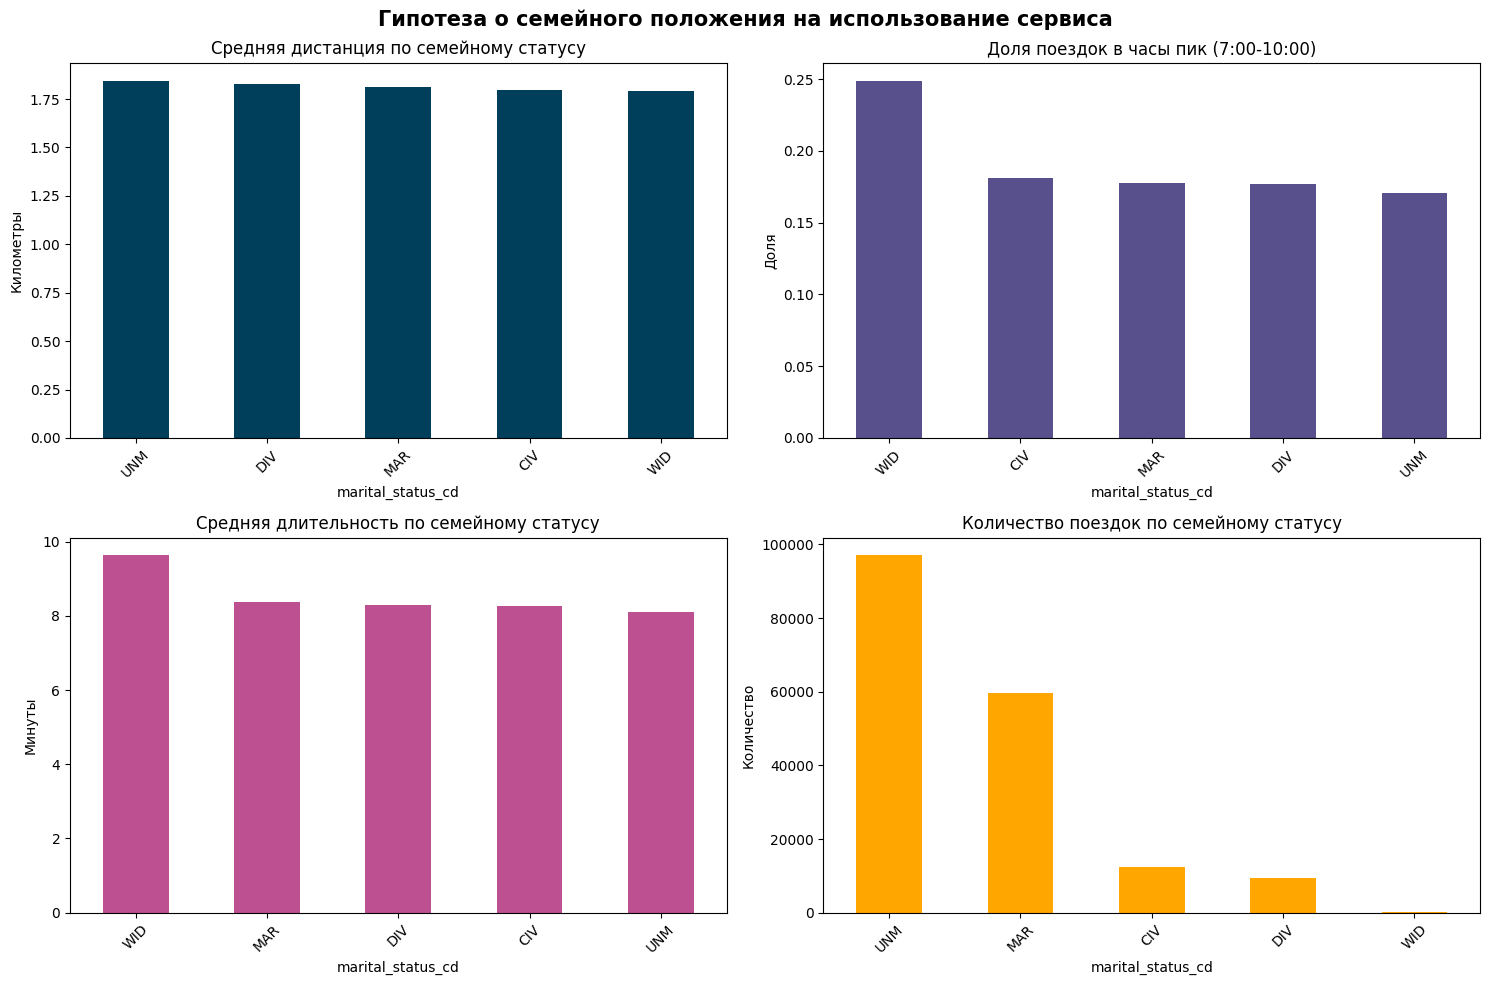

In [ ]:
# ГИПОТЕЗА 3: Влияние семейного статуса на модель использования
print("\n" + "="*61)
print("ГИПОТЕЗА 3: Влияние семейного статуса на модель использования")
print("="*61)

# Группируем по семейному статусу
marital_analysis = df_analysis.groupby('marital_status_cd').agg({
    'distance_km': ['mean', 'median'],
    'trip_duration_min': 'mean',
    'hour': lambda x: (x.between(7, 10).mean()),  # доля поездок в утренние часы пик (7:00-10:00)
    'order_rk': 'count',
    'nominal_price_rub_amt': 'mean'
}).round(3) 

marital_analysis.columns = ['avg_distance', 'median_distance', 'avg_duration', 'peak_hours_ratio', 'trip_count', 'avg_price']

print("Статистика по семейному статусу:")
print(marital_analysis)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Средняя дистанция (сортировка по убыванию)
marital_analysis_sorted_distance = marital_analysis.sort_values('avg_distance', ascending=False)
marital_analysis_sorted_distance['avg_distance'].plot(kind='bar', ax=axes[0,0], color='#003f5c')
axes[0,0].set_title('Средняя дистанция по семейному статусу')
axes[0,0].set_ylabel('Километры')
axes[0,0].tick_params(axis='x', rotation=45)

# Доля поездок в часы пик (сортировка по убыванию)
marital_analysis_sorted_peak = marital_analysis.sort_values('peak_hours_ratio', ascending=False)
marital_analysis_sorted_peak['peak_hours_ratio'].plot(kind='bar', ax=axes[0,1], color='#58508d')
axes[0,1].set_title('Доля поездок в часы пик (7:00-10:00)')
axes[0,1].set_ylabel('Доля')
axes[0,1].tick_params(axis='x', rotation=45)

# Средняя длительность (сортировка по убыванию)
marital_analysis_sorted_duration = marital_analysis.sort_values('avg_duration', ascending=False)
marital_analysis_sorted_duration['avg_duration'].plot(kind='bar', ax=axes[1,0], color='#bc5090')
axes[1,0].set_title('Средняя длительность по семейному статусу')
axes[1,0].set_ylabel('Минуты')
axes[1,0].tick_params(axis='x', rotation=45)

# Количество поездок (сортировка по убыванию)
marital_analysis_sorted_count = marital_analysis.sort_values('trip_count', ascending=False)
marital_analysis_sorted_count['trip_count'].plot(kind='bar', ax=axes[1,1], color='#ffa600')
axes[1,1].set_title('Количество поездок по семейному статусу')
axes[1,1].set_ylabel('Количество')
axes[1,1].tick_params(axis='x', rotation=45)

plt.suptitle('Гипотеза о семейного положения на использование сервиса', fontweight='bold', fontsize=15)
plt.tight_layout()